In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Варіант №5:

Завдання 3

Алгоритм Сугено і Такажі


| $A_1$            	| $A_2$         	| $B_1$         	| $B_2$            	| $C_1$            	| $C_2$         	| $x_0$ 	| $y_0$ 	| $a_1$ 	| $a_2$ 	| $b_1$ 	| $b_2$ 	|
|------------------	|---------------	|---------------	|------------------	|------------------	|---------------	|-------	|-------	|-------	|-------	|-------	|-------	|
| (13,18,28,30,1) 	| (13,18,25,1) 	| (18,25,30,1) 	| (20,28,33,40,1) 	| (10,20,30,40,1) 	| (20,28,35,1) 	| 15   	| 24   	| 0.5 	| 0.4 	| 0.3 	| 0.2 	|

In [2]:
# константи для вісі Y
yTriangle = [0, 1, 0]
yTrapeze = [0, 1, 1, 0]

# нечіткі трикутні числа та узагальнені нечіткі трапецієподібні інтервали
A1 = (13,18,28,30)
B1 = (18,25,30)
A2 = (13,18,25)
B2 = (20,28,33,40)

# вхідні змінні
x0 = 15
y0 = 24

# чіткі числа
a1 = 0.5
a2 = 0.4
b1 = 0.3
b2 = 0.2

<Figure size 640x480 with 0 Axes>

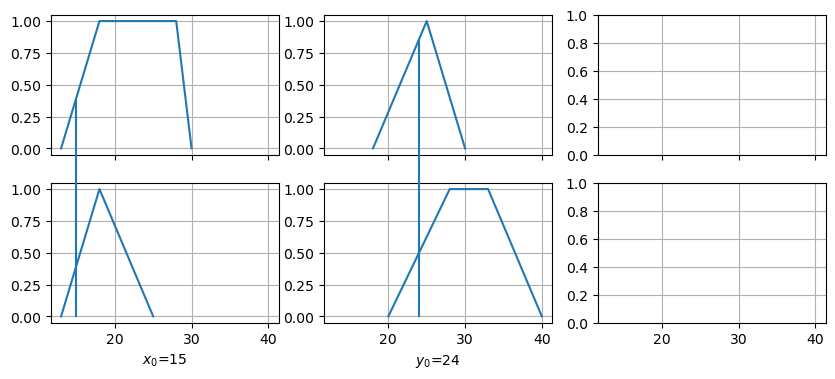

In [3]:
# Будуємо графіки належності нечітких величин для передумов кожного з правил:
fig = plt.figure()

fig, (axs1, axs2) = plt.subplots(2, 3, figsize=(10,4), sharex=True)

muA1, muB1, muC1 = axs1
muA2, muB2, muC2 = axs2

muA1.plot(A1, yTrapeze)
muB1.plot(B1, yTriangle)
muA2.plot(A2, yTriangle)
muB2.plot(B2, yTrapeze)

muA2.set_xlabel(r'$x_0$' + ('=%.0f' % x0))
muB2.set_xlabel(r'$y_0$' + ('=%.0f' % y0))

for axs in axs1:
    axs.grid()

for axs in axs2:
    axs.grid()

fig.canvas.draw()
# muA1.text(x0 - 2, 40, r'$K_1$')

transFigure = fig.transFigure.inverted()
coord1 = transFigure.transform(muA1.transData.transform([x0,0.37]))
coord2 = transFigure.transform(muA2.transData.transform([x0,0]))
line =  Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]), transform=fig.transFigure)
fig.lines.append(line)

coord1 = transFigure.transform(muB1.transData.transform([y0,0.85]))
coord2 = transFigure.transform(muB2.transData.transform([y0,0]))
line =  Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]), transform=fig.transFigure)
fig.lines.append(line)

Крок 1. Визначаємо міри істинності $A_1(x_0)$, $A_2(x_0)$, $B_1(y_0)$, $B_2(y_0)$

In [4]:
def lineFormula(x1, y1, x2, y2, x):
    k = (y1 - y2) / (x1 - x2)
    b = y2 - k * x2

    return k * x + b

K1 = (yTrapeze[0], A1[0]) # (0, 13)
L1 = (yTrapeze[1], A1[1]) # (1, 18)

K2 = (yTriangle[0], A2[0]) # (0, 13)
L2 = (yTriangle[1], A2[1]) # (1, 18)


P1 = (yTriangle[0], B1[0]) # (0, 18)
Q1 = (yTriangle[1], B1[1]) # (1, 25)

P2 = (yTrapeze[0], B2[0]) # (0, 20)
Q2 = (yTrapeze[1], B2[1]) # (1, 28)

A1x0 = lineFormula(*K1, *L1, x0)
A2x0 = lineFormula(*K2, *L2, x0)
B1y0 = lineFormula(*P1, *Q1, y0)
B2y0 = lineFormula(*P2, *Q2, y0)

Крок 2. Знаходимо рівні «відтинання» для передумов кожного з правил:

In [5]:
alpha1 = min({A1x0, B1y0})
alpha2 = min({A2x0, B2y0})

Розраховуємо значення функцій:

In [6]:
z1 = a1 * x0 + b1 * y0
z2 = a2 * x0 + b2 * y0

Крок 3. Визначаємо чітке значення вихідної змінної:

In [7]:
z0 = (alpha1 * z1 + alpha2 * z2) / (alpha1 + alpha2)

Відповідь: $z_0$ = 12.75